In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### 数据获取与解析

In [2]:
data = pd.read_csv('data/ads_train.csv', index_col=0)

In [3]:
data.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
1,0,nan,1,0.00000,0.00000,0.00000,0.00000,106,106,0,0,169,2130,0
2,0,nan,1,0.00000,0.00000,0.00000,0.00000,6,6,0,0,150,539,0
3,0,nan,2,0.00000,0.50000,0.00000,-101.14930,101,101,0,1,103,362,0
4,0,nan,1,0.00000,0.00000,0.00000,0.00000,42,42,0,0,17,35,0
5,0,nan,3,0.00000,45.47917,0.00000,-34.14473,64,64,0,1,100,298,0


### 统计每列属性缺失值的数量

In [4]:
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) #查看缺失值比例
print(check_null[check_null > 0.2])

buy_freq   0.95760
dtype: float64


In [5]:
check_null

buy_freq              0.95760
y_buy                 0.00000
num_checkins          0.00000
uniq_urls             0.00000
multiple_visit        0.00000
multiple_buy          0.00000
last_visit            0.00000
last_buy              0.00000
expected_time_visit   0.00000
expected_time_buy     0.00000
sv_interval           0.00000
buy_interval          0.00000
visit_freq            0.00000
isbuyer               0.00000
dtype: float64

In [6]:
thresh_count = len(data)*0.4 # 设定阀值
data = data.dropna(thresh=thresh_count, axis=1 ) #若某一列数据缺失的数量超过阀值就会被删除

In [7]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))

y_buy                 0.00000
num_checkins          0.00000
uniq_urls             0.00000
multiple_visit        0.00000
multiple_buy          0.00000
last_visit            0.00000
last_buy              0.00000
expected_time_visit   0.00000
expected_time_buy     0.00000
sv_interval           0.00000
buy_interval          0.00000
visit_freq            0.00000
isbuyer               0.00000
dtype: float64

In [8]:
data.to_csv('data/ads_train_v1.csv', index = False)

In [9]:
data = pd.read_csv('data/ads_train_v1.csv') 
data.dtypes.value_counts()# 分类统计数据类型

int64      9
float64    4
dtype: int64

In [10]:
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

In [11]:
data.shape

(38209, 13)

### 缺失值处理---------分类型变量

In [12]:
objectColumns = data.select_dtypes(include=["object"]).columns
data[objectColumns].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

### 缺失值处理——数值型变量

In [13]:
data.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

y_buy                  0
num_checkins           0
uniq_urls              0
multiple_visit         0
multiple_buy           0
last_visit             0
last_buy               0
expected_time_visit    0
expected_time_buy      0
sv_interval            0
buy_interval           0
visit_freq             0
isbuyer                0
dtype: int64

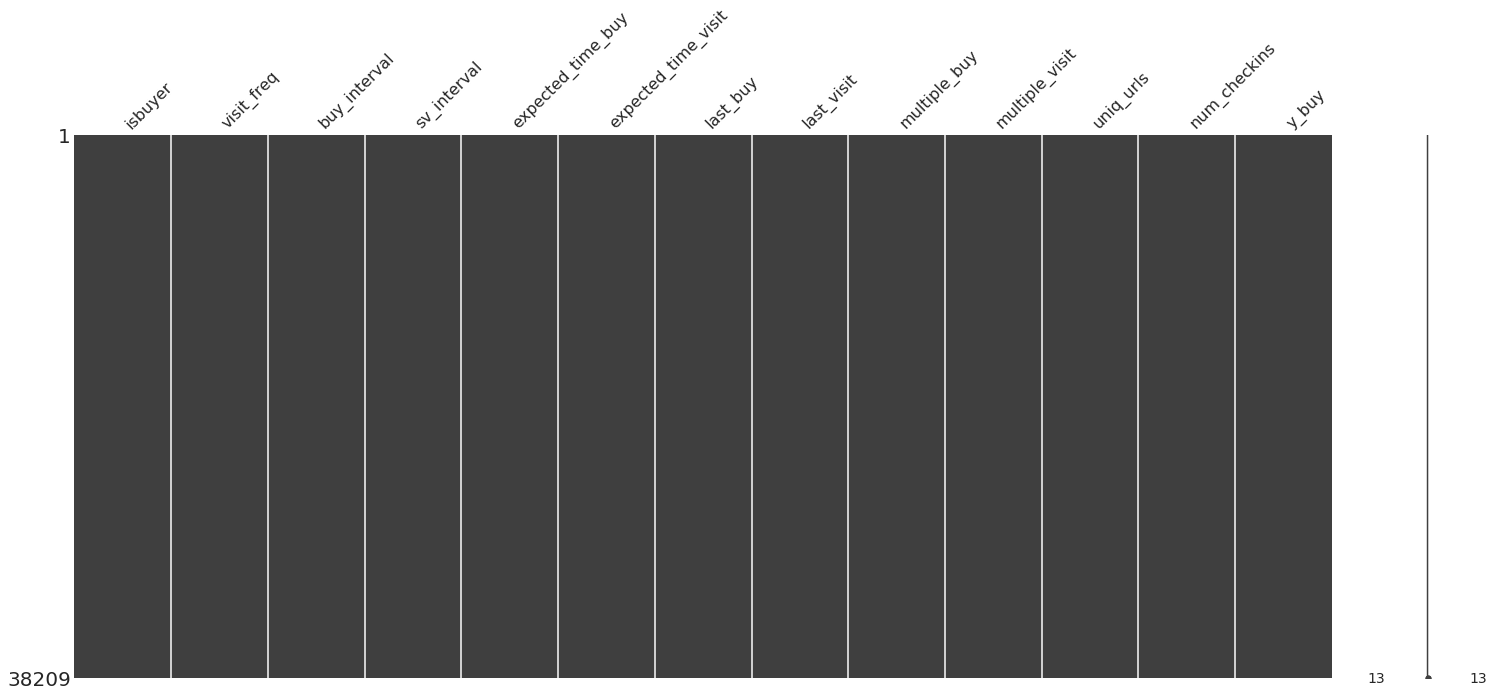

In [14]:
numColumns = data.select_dtypes(include=[np.number]).columns
msno.matrix(data[numColumns])

In [15]:
pd.set_option('display.max_columns', len(data.columns))
data[numColumns]

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.00000,0.00000,0.00000,0.00000,106,106,0,0,169,2130,0
1,0,1,0.00000,0.00000,0.00000,0.00000,6,6,0,0,150,539,0
2,0,2,0.00000,0.50000,0.00000,-101.14930,101,101,0,1,103,362,0
3,0,1,0.00000,0.00000,0.00000,0.00000,42,42,0,0,17,35,0
4,0,3,0.00000,45.47917,0.00000,-34.14473,64,64,0,1,100,298,0
5,0,1,0.00000,0.00000,0.00000,0.00000,13,13,0,0,53,247,0
6,1,2,0.00000,0.95833,0.00000,-20.67120,21,21,0,1,65,175,0
7,0,1,0.00000,0.00000,0.00000,0.00000,151,151,0,0,24,198,0
8,0,1,0.00000,0.00000,0.00000,0.00000,68,68,0,0,64,305,0
9,0,2,0.00000,15.95833,0.00000,-6.68347,14,14,0,1,101,1105,0


In [16]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 针对axis=0 列来处理
imr = imr.fit(data[numColumns])
data[numColumns] = imr.transform(data[numColumns])

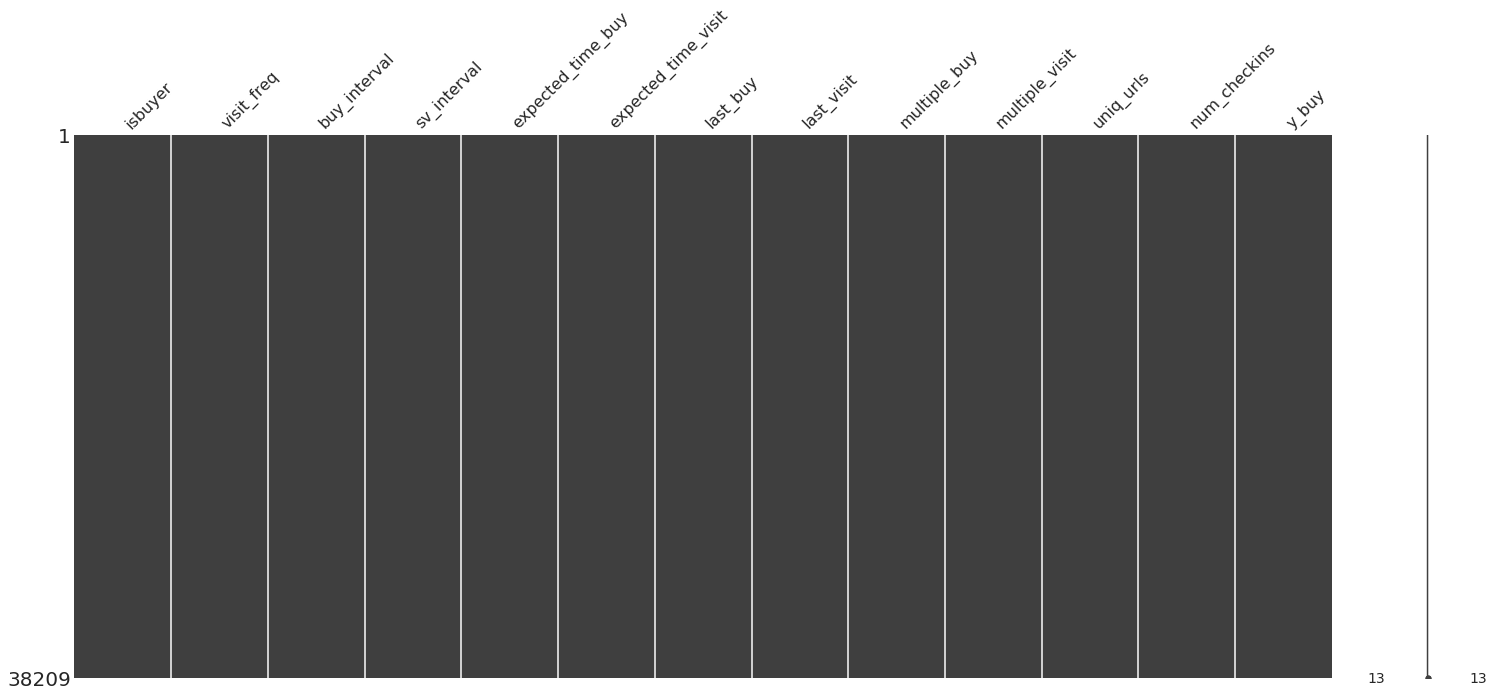

In [17]:
msno.matrix(data)

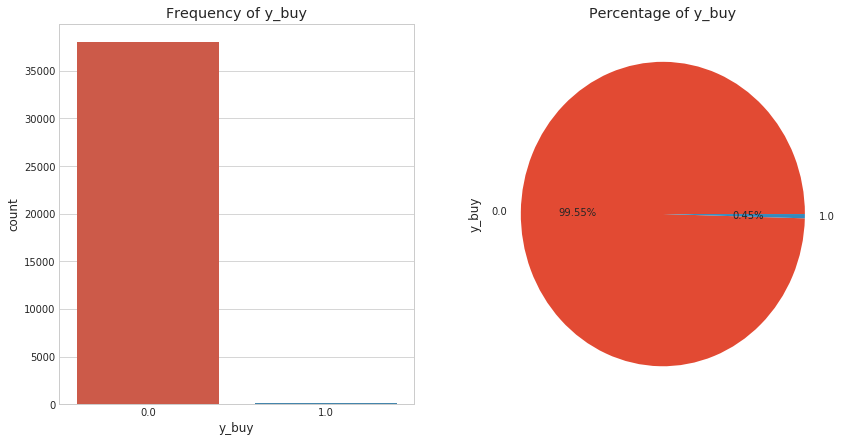

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(x='y_buy', data=data, ax=axs[0])
axs[0].set_title('Frequency of y_buy')
data['y_buy'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of y_buy")
plt.show()

### 特征缩放

In [22]:
col = data.select_dtypes(include=['int64','float64']).columns
col = col.drop('y_buy')

In [23]:
print(col)

Index(['isbuyer', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'last_buy', 'last_visit',
       'multiple_buy', 'multiple_visit', 'uniq_urls', 'num_checkins'],
      dtype='object')


In [24]:
data_ml_df = data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_ml_df[col] = sc.fit_transform(data_ml_df[col])
data_ml_df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,-0.21042,-0.28972,-0.05120,-0.33071,0.03645,0.31880,0.77344,0.77344,-0.07748,-0.61978,1.33040,1.09313,0.00000
1,-0.21042,-0.28972,-0.05120,-0.33071,0.03645,0.31880,-1.09737,-1.09737,-0.07748,-0.61978,1.02365,-0.14369,0.00000
2,-0.21042,0.04398,-0.05120,-0.30250,0.03645,-2.86235,0.67990,0.67990,-0.07748,1.61346,0.26486,-0.28128,0.00000
3,-0.21042,-0.28972,-0.05120,-0.33071,0.03645,0.31880,-0.42388,-0.42388,-0.07748,-0.61978,-1.12358,-0.53549,0.00000
4,-0.21042,0.37769,-0.05120,2.23494,0.03645,-0.75505,-0.01230,-0.01230,-0.07748,1.61346,0.21642,-0.33104,0.00000


### 特征选择

In [25]:
x_feature = list(data_ml_df.columns)
x_feature.remove('y_buy')
x_val = data_ml_df[x_feature]
y_val = data_ml_df['y_buy']
len(x_feature)

12

In [26]:
x_val.describe().T

,count,mean,std,min,25%,50%,75%,max
isbuyer,38209.00000,-0.00000,1.00001,-0.21042,-0.21042,-0.21042,-0.21042,4.75245
visit_freq,38209.00000,-0.00000,1.00001,-0.62343,-0.28972,-0.28972,0.04398,27.40800
buy_interval,38209.00000,-0.00000,1.00001,-0.05120,-0.05120,-0.05120,-0.05120,45.23993
sv_interval,38209.00000,0.00000,1.00001,-0.33071,-0.33071,-0.33071,-0.32365,10.10111
expected_time_buy,38209.00000,0.00000,1.00001,-37.99113,0.03645,0.03645,0.03645,17.65471
expected_time_visit,38209.00000,0.00000,1.00001,-5.58172,0.31880,0.31880,0.31880,3.19340
last_buy,38209.00000,-0.00000,1.00001,-1.20962,-0.87287,-0.27421,0.75473,2.30751
last_visit,38209.00000,-0.00000,1.00001,-1.20962,-0.87287,-0.27421,0.75473,2.30751
multiple_buy,38209.00000,-0.00000,1.00001,-0.07748,-0.07748,-0.07748,-0.07748,12.90672
multiple_visit,38209.00000,-0.00000,1.00001,-0.61978,-0.61978,-0.61978,1.61346,1.61346


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 8)
rfe = rfe.fit(x_val, y_val)

In [28]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True  True  True  True  True  True False]
[1 2 5 1 4 1 1 1 1 1 1 3]


In [30]:
col_filter = x_val.columns[rfe.support_]
col_filter

Index(['isbuyer', 'sv_interval', 'expected_time_visit', 'last_buy',
       'last_visit', 'multiple_buy', 'multiple_visit', 'uniq_urls'],
      dtype='object')

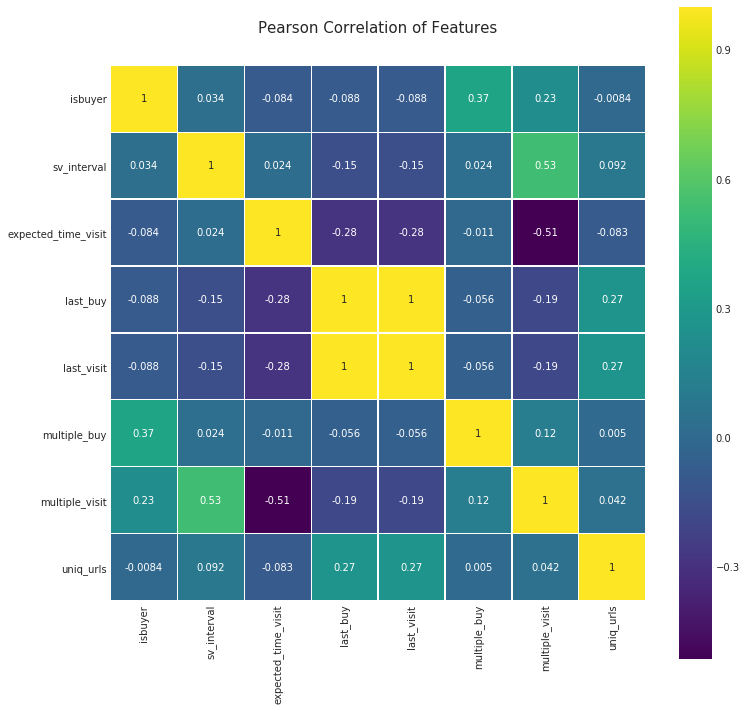

In [31]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_ml_df[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

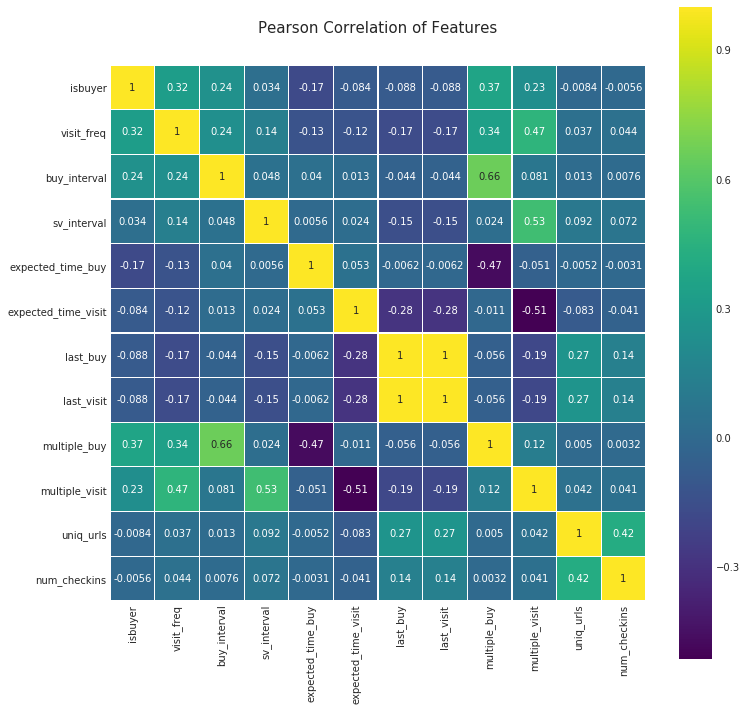

In [32]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_ml_df[col].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [33]:
names = data_ml_df[col].columns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=123)
clf.fit(x_val[col], y_val)
for feature in zip(names, clf.feature_importances_):
    print(feature)

/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


('isbuyer', 0.014385078535008594)
('visit_freq', 0.07697039097250591)
('buy_interval', 0.0225672219983465)
('sv_interval', 0.14128185707638452)
('expected_time_buy', 0.014937281219482266)
('expected_time_visit', 0.14788821328650872)
('last_buy', 0.0651464210918958)
('last_visit', 0.07306841204821432)
('multiple_buy', 0.004664665410313888)
('multiple_visit', 0.00430014195252504)
('uniq_urls', 0.18665009956544049)
('num_checkins', 0.24814021684337387)


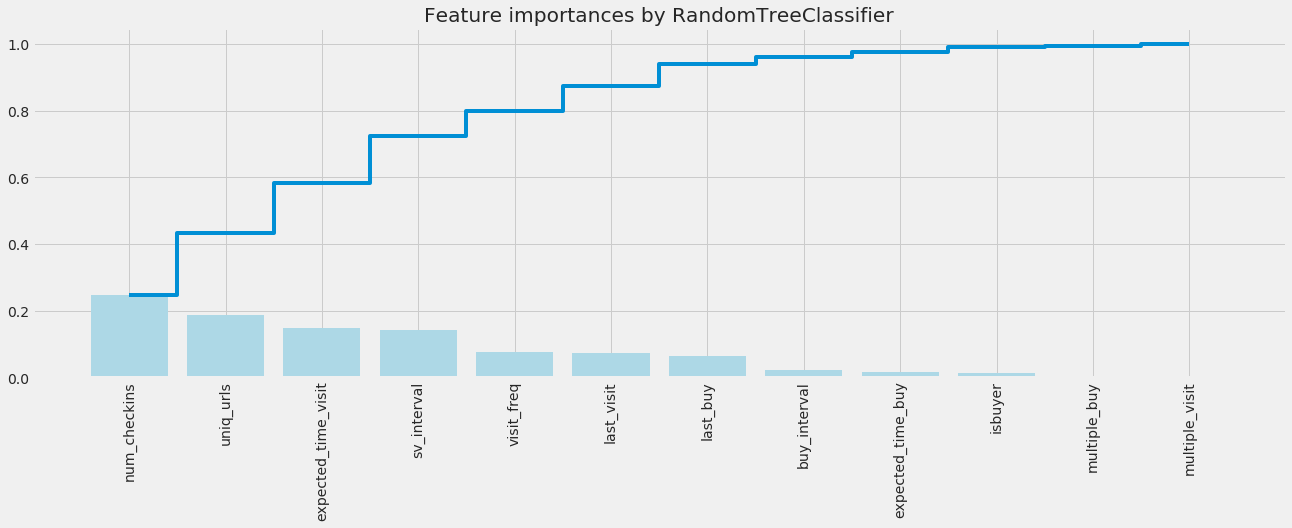

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [35]:
X = data_ml_df[col]
y = data_ml_df['y_buy']

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：38209; 正样本占99.55%; 负样本占0.45%
特征维数： 12


In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_source, y_source = X, y
X, y = sm.fit_sample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：76074; 正样本占50.00%; 负样本占50.00%


### 构建分类器进行训练

In [38]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predicted1 = clf.predict(X)

In [40]:
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y)))

Test set accuracy score: 0.53159


In [41]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y, predicted1) 
m

array([[38037,     0],
       [35634,  2403]])

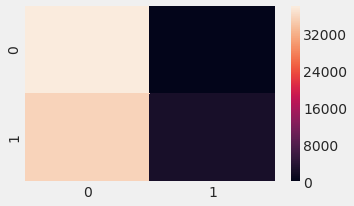

In [42]:
plt.figure(figsize=(5,3))
sns.heatmap(m)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

             precision    recall  f1-score   support

        0.0       0.52      1.00      0.68     38037
        1.0       1.00      0.06      0.12     38037

avg / total       0.76      0.53      0.40     76074



In [44]:
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.531588


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样
# 构建参数组合
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # 确定模型LogisticRegression，和参数组合param_grid ，cv指定5折
cl2 = grid_search.fit(X_train, y_train)

In [49]:
results = pd.DataFrame(cl2.cv_results_) 
best = np.argmax(results.mean_test_score.values)

In [50]:
best

0

In [51]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,...,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.13304,0.00769,0.00151,0.00053,0.01000,l1,...,0.78196,0.78192,0.78250,0.78309,0.78221,0.00068
1,0.19218,0.00837,0.00147,0.00052,0.01000,l2,...,0.78193,0.78173,0.78242,0.78309,0.78211,0.00070
2,0.19784,0.07992,0.00254,0.00181,0.10000,l1,...,0.78166,0.78154,0.78225,0.78298,0.78187,0.00069
3,0.18653,0.00797,0.00157,0.00052,0.10000,l2,...,0.78162,0.78148,0.78221,0.78288,0.78180,0.00068
4,0.15841,0.01553,0.00153,0.00073,1,l1,...,0.78164,0.78133,0.78219,0.78290,0.78179,0.00068
5,0.19012,0.01039,0.00124,0.00016,1,l2,...,0.78164,0.78140,0.78219,0.78290,0.78180,0.00068
6,0.15025,0.01985,0.00167,0.00108,10,l1,...,0.78164,0.78133,0.78219,0.78288,0.78180,0.00067
7,0.18929,0.01158,0.00147,0.00057,10,l2,...,0.78164,0.78133,0.78219,0.78288,0.78179,0.00067
8,0.14740,0.01162,0.00123,0.00027,100,l1,...,0.78164,0.78133,0.78221,0.78288,0.78179,0.00067
9,0.20618,0.02324,0.00232,0.00208,100,l2,...,0.78164,0.78133,0.78219,0.78288,0.78179,0.00067


In [54]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 0.01, 'penalty': 'l1'}
Best cross-validation score: 0.78220


In [59]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))

Test set accuracy score: 0.77426


In [60]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.73      0.85      0.79     11263
        1.0       0.83      0.70      0.76     11560

avg / total       0.78      0.77      0.77     22823



In [63]:
y_pred = grid_search.predict(X)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y, y_pred,)))
print(classification_report(y_pred, y))

Test set accuracy score: 0.77985
             precision    recall  f1-score   support

        0.0       0.85      0.74      0.79     43515
        1.0       0.71      0.83      0.76     32559

avg / total       0.79      0.78      0.78     76074



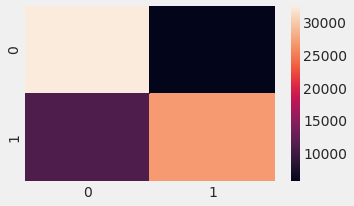

In [65]:
m2 = confusion_matrix(y, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(m2)

In [67]:
roc_auc2 = roc_auc_score(y, y_pred)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.779846


In [69]:
y_pred_proba = grid_search.predict_proba(X_test) 

In [70]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9651162790697675
Recall metric in the testing dataset:  0.9302325581395349
Recall metric in the testing dataset:  0.9186046511627907
Recall metric in the testing dataset:  0.8372093023255814
Recall metric in the testing dataset:  0.7034883720930233
Recall metric in the testing dataset:  0.6686046511627907
Recall metric in the testing dataset:  0.622093023255814
Recall metric in the testing dataset:  0.4476744186046512
Recall metric in the testing dataset:  0.27906976744186046


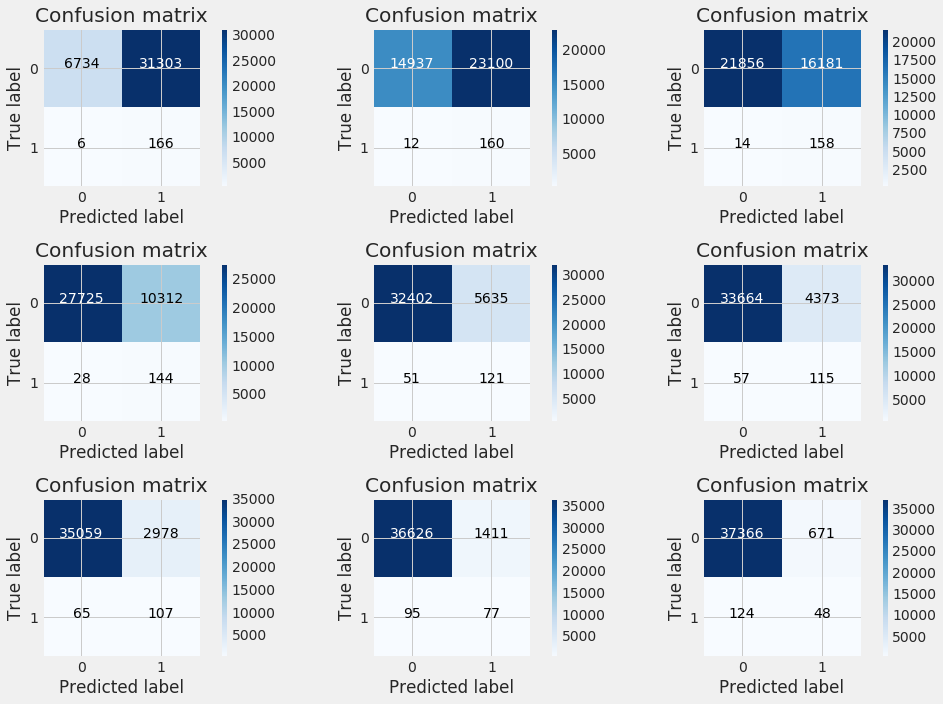

In [73]:
import itertools
y_pred_proba = grid_search.predict_proba(data_ml_df[col])  #predict_prob 获得一个概率值

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(data_ml_df['y_buy'], y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("thresholds: {}, Recall metric in the testing dataset: {}", (i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names)

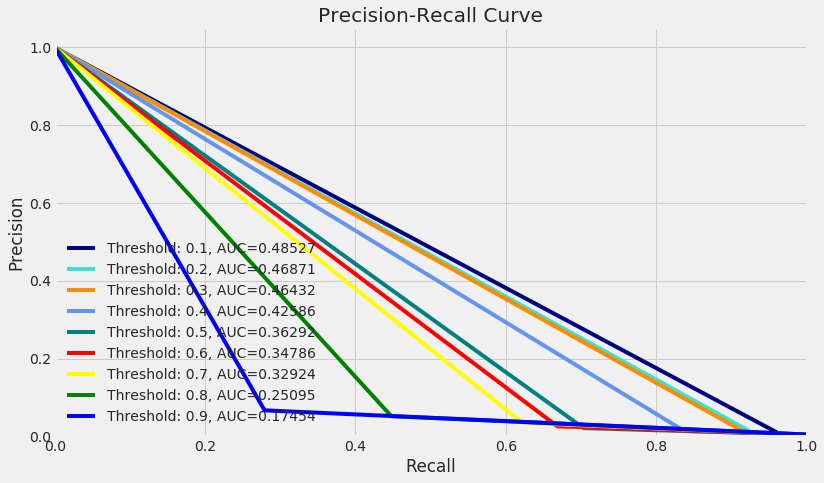

In [77]:
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #预测出来的概率值是否大于阈值  

    precision, recall, thresholds = precision_recall_curve(data_ml_df['y_buy'], y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
